# E-commerce Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [4]:
df=pd.read_csv('ecommerce_customer_data_large.csv')

In [6]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [8]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [12]:
df.shape

(250000, 13)

In [14]:
pd.isnull(df).sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [18]:
df.shape

(202618, 13)

In [20]:
df['Returns']=df['Returns'].astype(int)

In [22]:
df['Returns'].dtypes

dtype('int32')

In [24]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [26]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,202618.000000,202618.000000,202618.000000,202618.000000,202618.000000,202618.000000,202618.000000,202618.000000
mean,25020.140234,254.899066,3.008420,2725.817662,43.817923,0.500824,43.817923,0.201088
std,14412.388674,141.720425,1.414339,1442.268491,15.356067,0.500001,15.356067,0.400815
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12599.250000,133.000000,2.000000,1478.000000,30.000000,0.000000,30.000000,0.000000
50%,25018.000000,255.000000,3.000000,2727.000000,44.000000,1.000000,44.000000,0.000000
75%,37444.000000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.000000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [28]:
df[['Customer Age','Returns','Age']].describe()	

,Customer Age,Returns,Age
count,202618.000000,202618.000000,202618.000000
mean,43.817923,0.500824,43.817923
std,15.356067,0.500001,15.356067
min,18.000000,0.000000,18.000000
25%,30.000000,0.000000,30.000000
50%,44.000000,1.000000,44.000000
75%,57.000000,1.000000,57.000000
max,70.000000,1.000000,70.000000


# EDA(Explanatory Data Analytics)

## Product Category

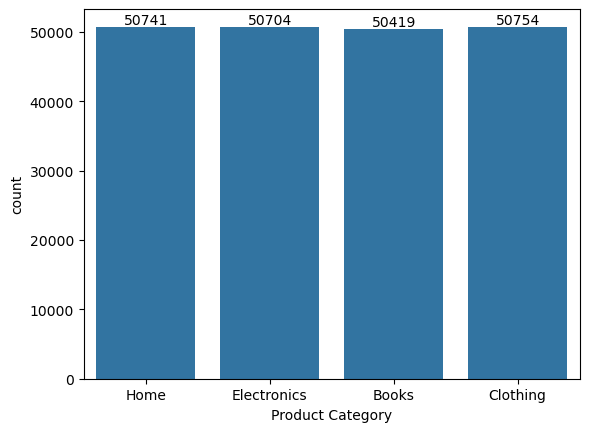

In [32]:
ax=sns.countplot(x='Product Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

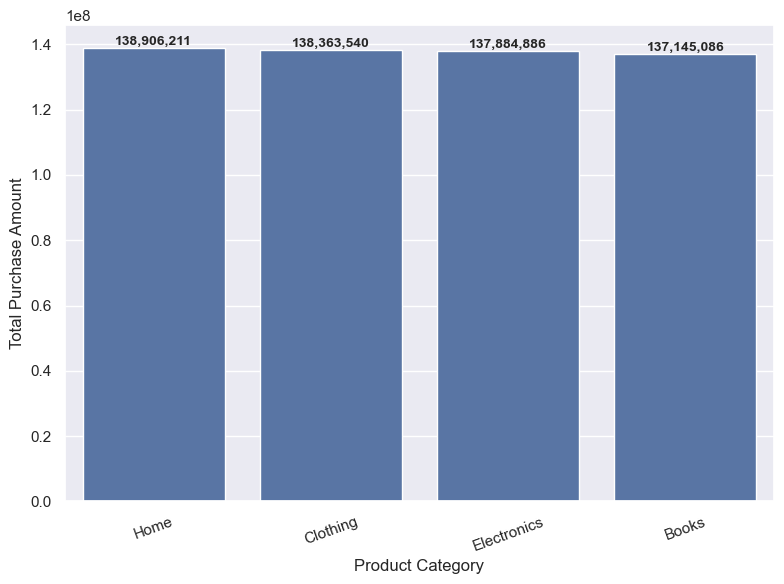

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and sorting
total_purchase_by_category = df.groupby(['Product Category'], as_index=False)['Total Purchase Amount'] \
                                .sum().sort_values(by='Total Purchase Amount', ascending=False)

# Set figure size
sns.set(rc={'figure.figsize':(8,6)})

# Create barplot
ax = sns.barplot(data=total_purchase_by_category, x='Product Category', y='Total Purchase Amount')

# Add labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        height,                              # y position
        f'{height:,.0f}',                    # format number with comma
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Optional: rotate x-axis labels if needed
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

***From the above graphn we know that E-commerce site gets most order for clothing But they earn highest revenue by selling home essential***

## Gender

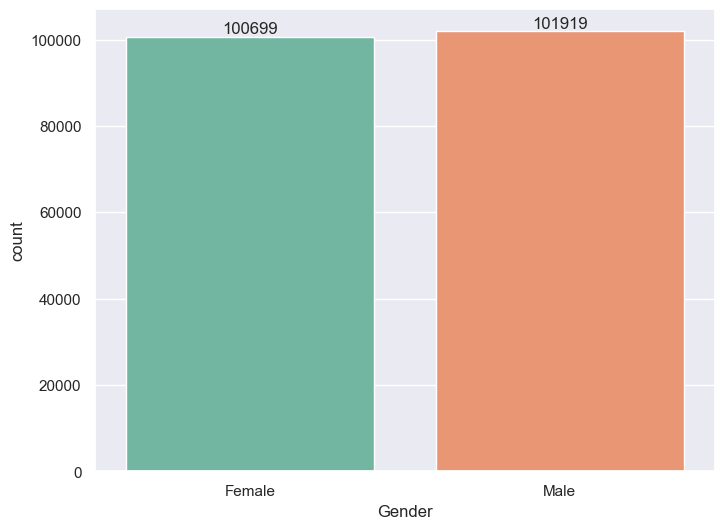

In [38]:
import warnings
warnings.filterwarnings('ignore')
ax = sns.countplot(x='Gender', data=df, palette='Set2')  # Try Set1, Set2, or any palette
for bars in ax.containers:
    ax.bar_label(bars)

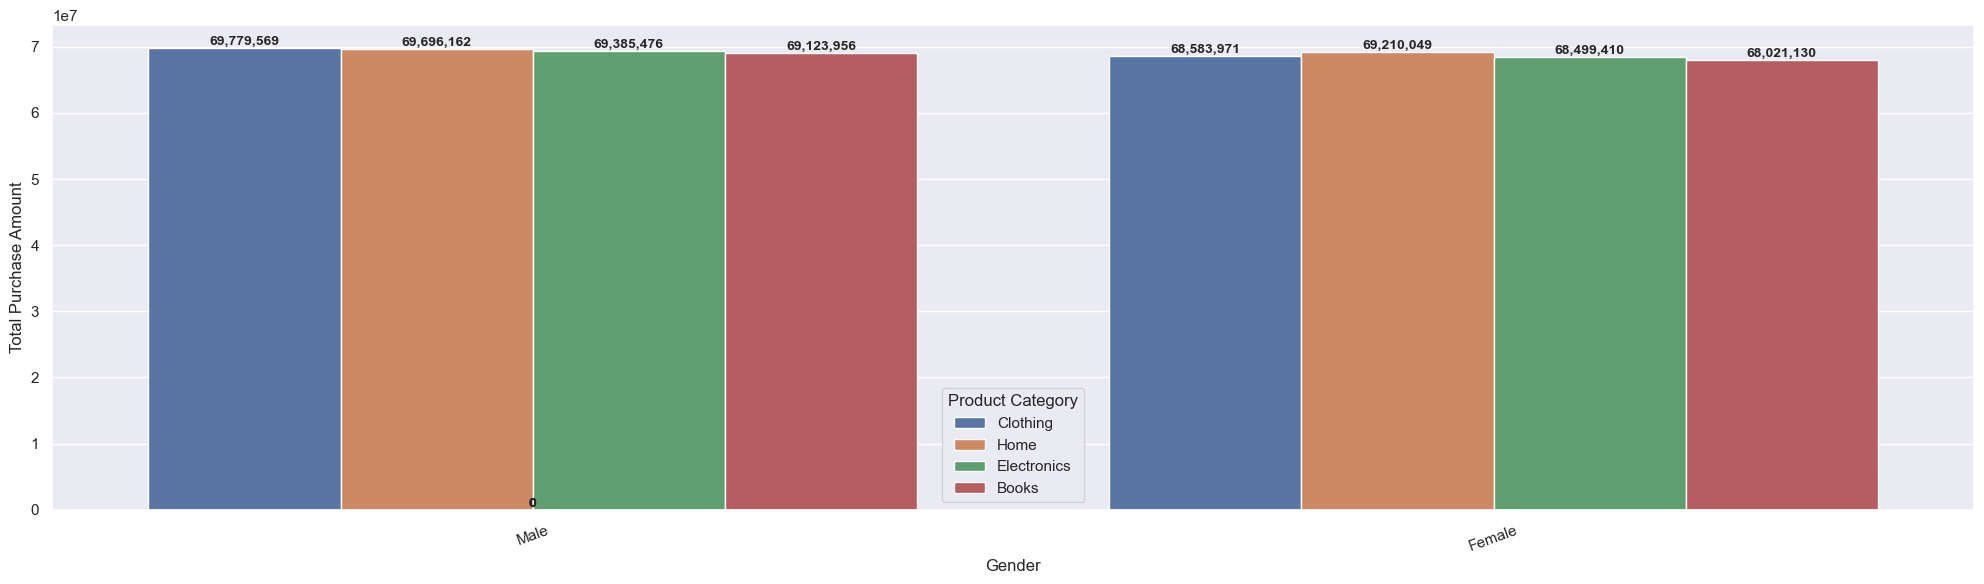

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and sorting
total_purchase_Gender = df.groupby(['Gender','Product Category'], as_index=False)['Total Purchase Amount'] \
                                .sum().sort_values(by='Total Purchase Amount', ascending=False)

# Set figure size
sns.set(rc={'figure.figsize':(20,6)})

# Create barplot
ax = sns.barplot(x='Gender', y='Total Purchase Amount',hue='Product Category',data=total_purchase_Gender)

# Add labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        height,                              # y position
        f'{height:,.0f}',                    # format number with comma
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Optional: rotate x-axis labels if needed
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

***From the above graph Male order most from the E-commerce platform.Most sales revenue earned from male in all categories(i,e clothing,Home,Electronics,Books]sales.***

## Payment Method

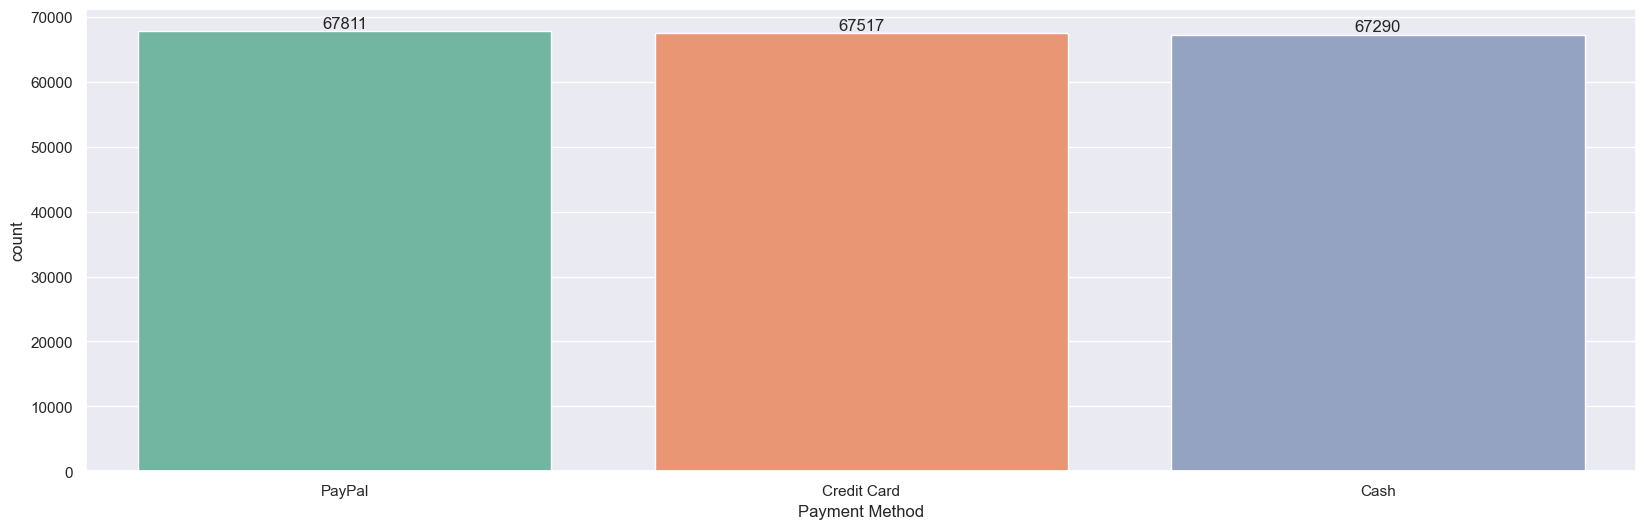

In [44]:
import warnings
warnings.filterwarnings('ignore')
ax = sns.countplot(x='Payment Method', data=df, palette='Set2')  # Try Set1, Set2, or any palette
for bars in ax.containers:
    ax.bar_label(bars)

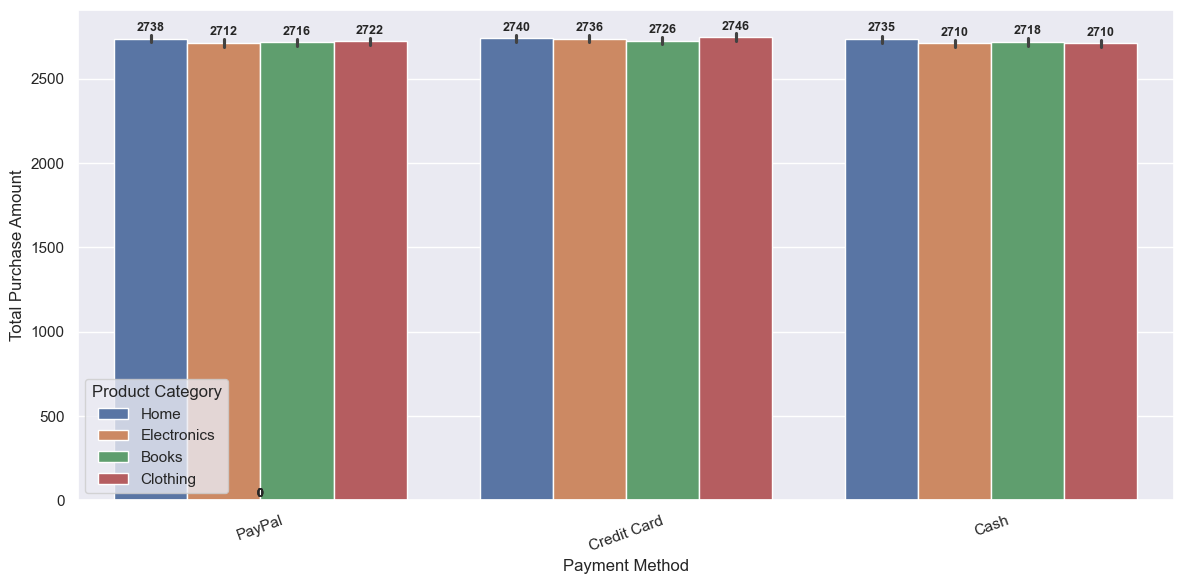

In [45]:
# Set wider figure size
sns.set(rc={'figure.figsize': (12, 6)})

# Plot grouped bar chart
ax = sns.barplot(
    x='Payment Method',
    y='Total Purchase Amount',
    hue='Product Category',
    data=df
)

# Add value labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01 * height,
        f'{height:.0f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Improve Layout
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

* ***From the graphs paypal is highest payment method but out of total purchase amount major portion paymet is done by credit card.***

## Product Price

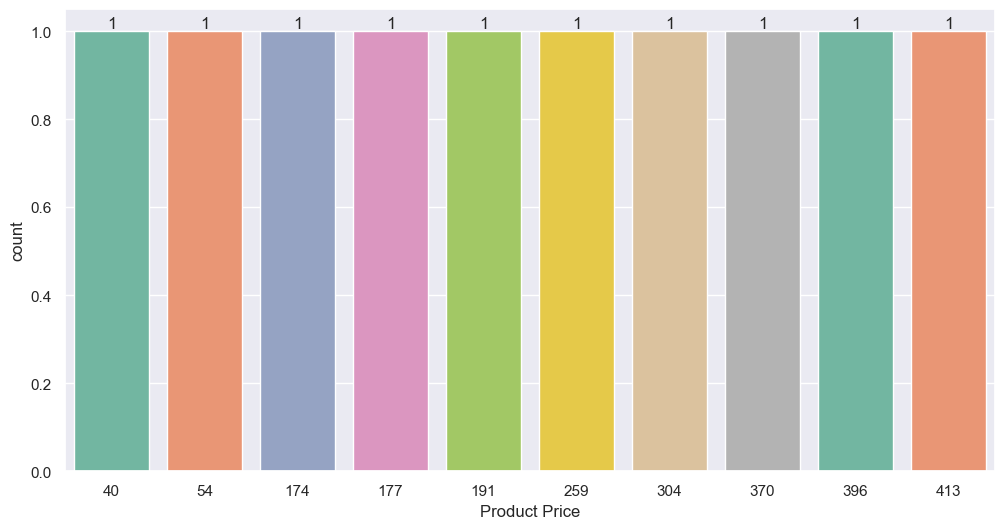

In [50]:
ax = sns.countplot(x='Product Price', data=df.head(10), palette='Set2')  # Try Set1, Set2, or any palette
for bars in ax.containers:
    ax.bar_label(bars)

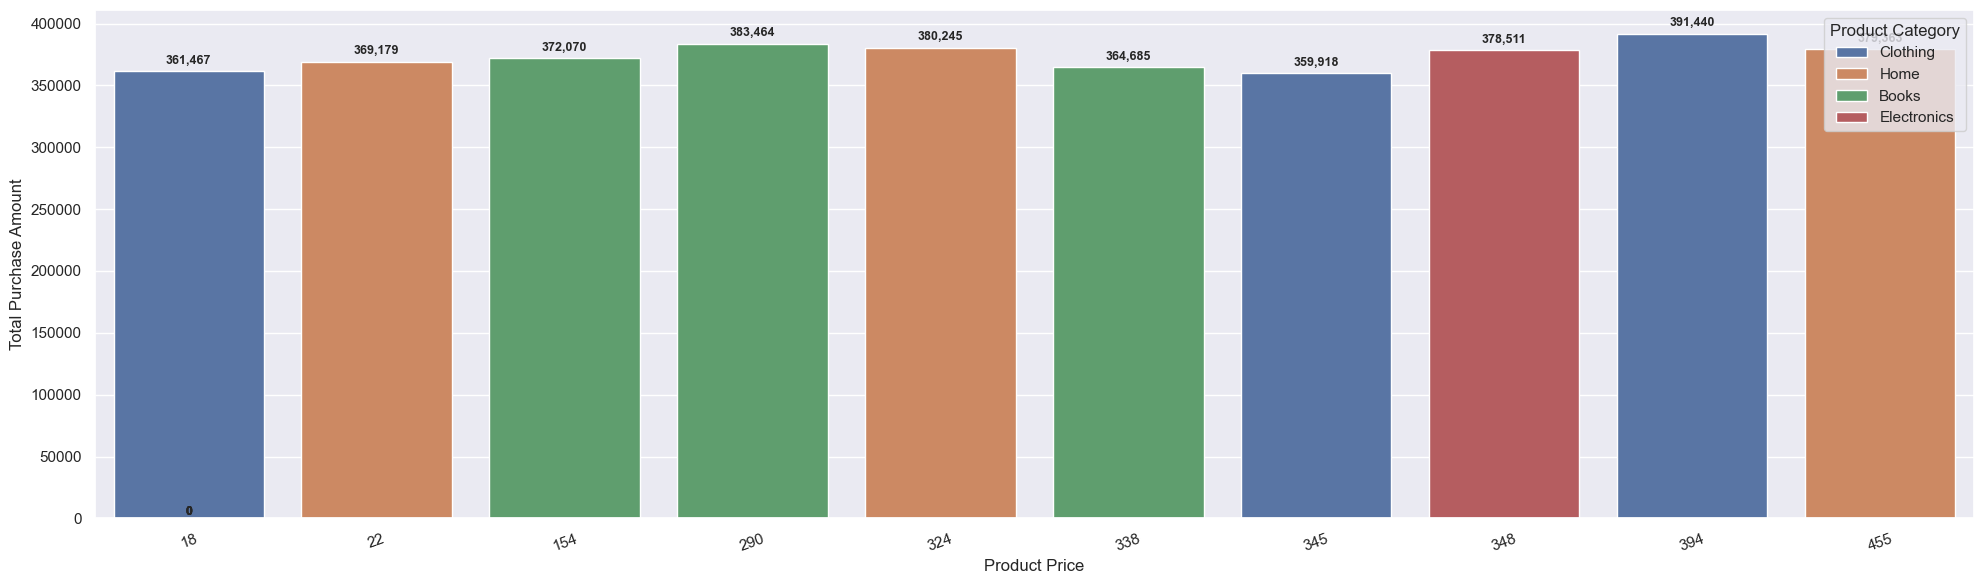

In [52]:
# Step 1: Create the grouped DataFrame first
Product_Price_Total_Purchase_Amount = df.groupby(
    ['Product Price', 'Product Category'], as_index=False
)['Total Purchase Amount'].sum().sort_values(
    by='Total Purchase Amount', ascending=False
).head(10)

# Step 2: Plot
sns.set(rc={'figure.figsize': (20, 6)})

ax = sns.barplot(
    x='Product Price', 
    y='Total Purchase Amount',
    hue='Product Category',
    data=Product_Price_Total_Purchase_Amount
)

# Step 3: Add value labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01 * height,
        f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Step 4: Improve layout
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Quantity

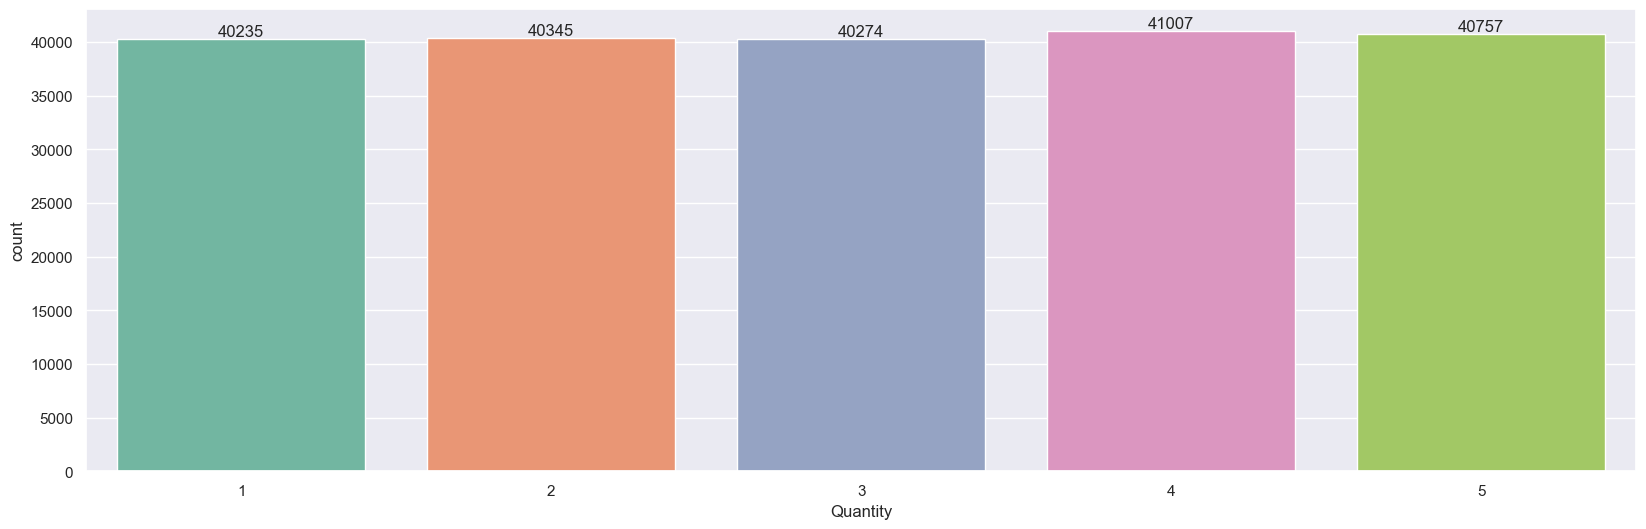

In [55]:
import warnings
warnings.filterwarnings('ignore')
ax = sns.countplot(x='Quantity', data=df, palette='Set2')  # Try Set1, Set2, or any palette
for bars in ax.containers:
    ax.bar_label(bars)

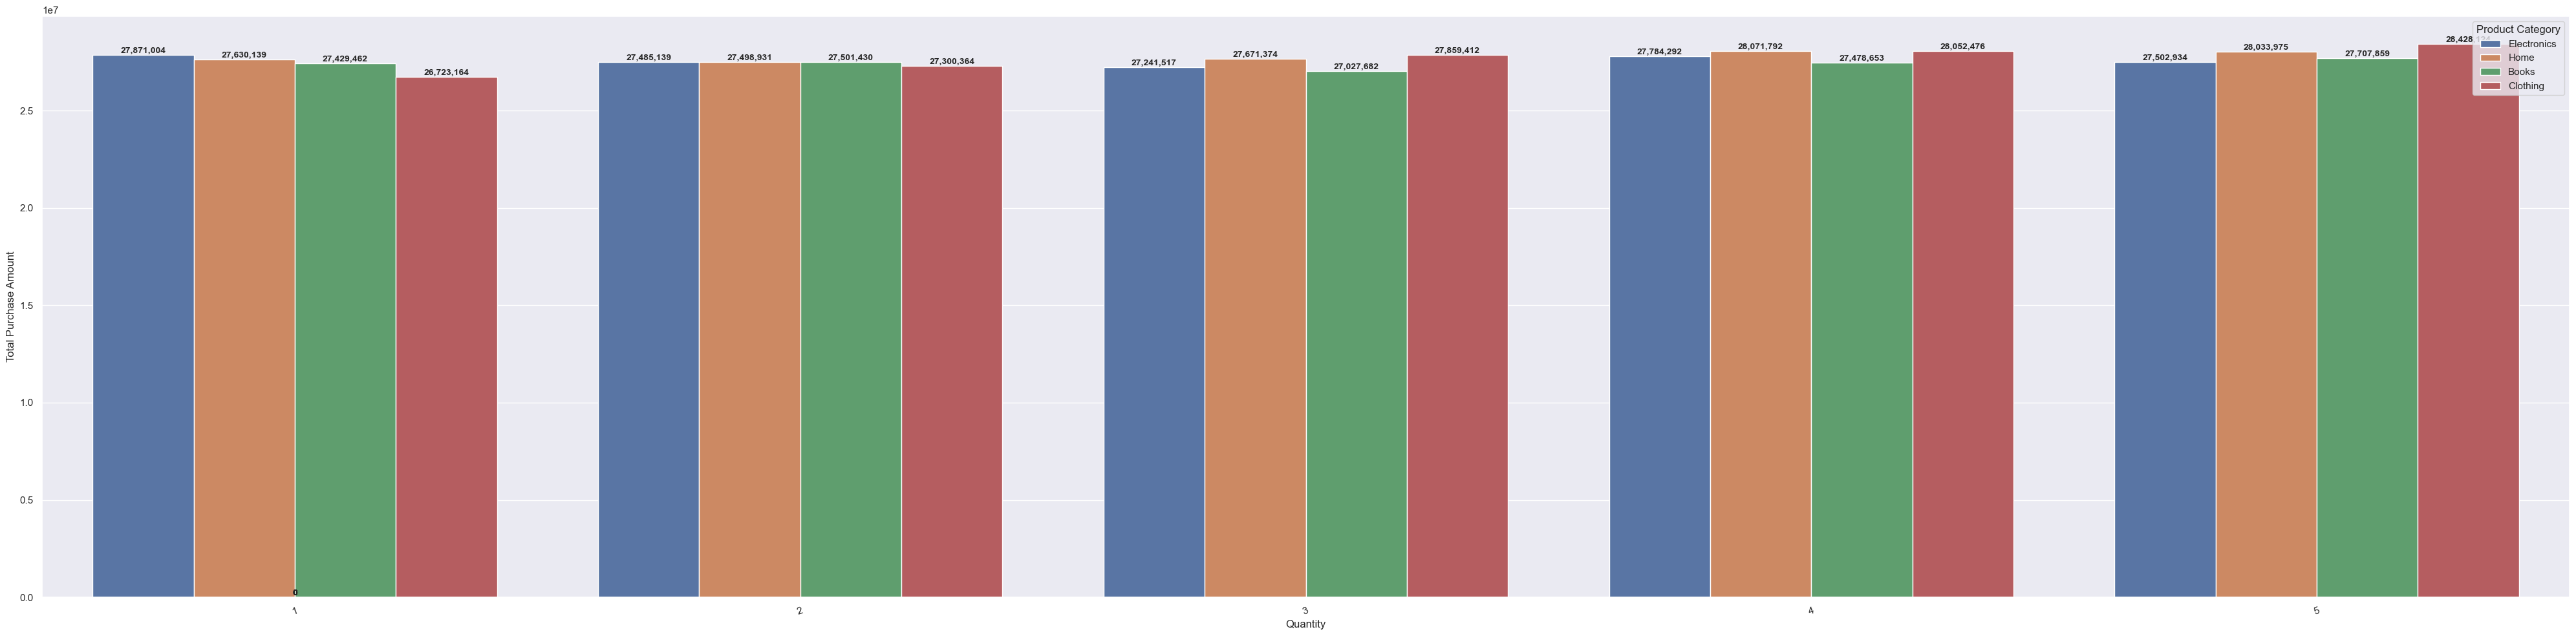

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and sorting
total_purchase_Gender = df.groupby(['Quantity','Product Category'], as_index=False)['Total Purchase Amount'] \
                                .sum().sort_values(by='Total Purchase Amount', ascending=False)

# Set figure size
sns.set(rc={'figure.figsize':(40,10)})

# Create barplot
ax = sns.barplot(x='Quantity', y='Total Purchase Amount',hue='Product Category',data=total_purchase_Gender)

# Add labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        height,                              # y position
        f'{height:,.0f}',                    # format number with comma
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Optional: rotate x-axis labels if needed
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

* ***Thuough Highest ordered quantity is 4 but most revenue earned by selling 1 quantity by E-commerce website.***

## Returns

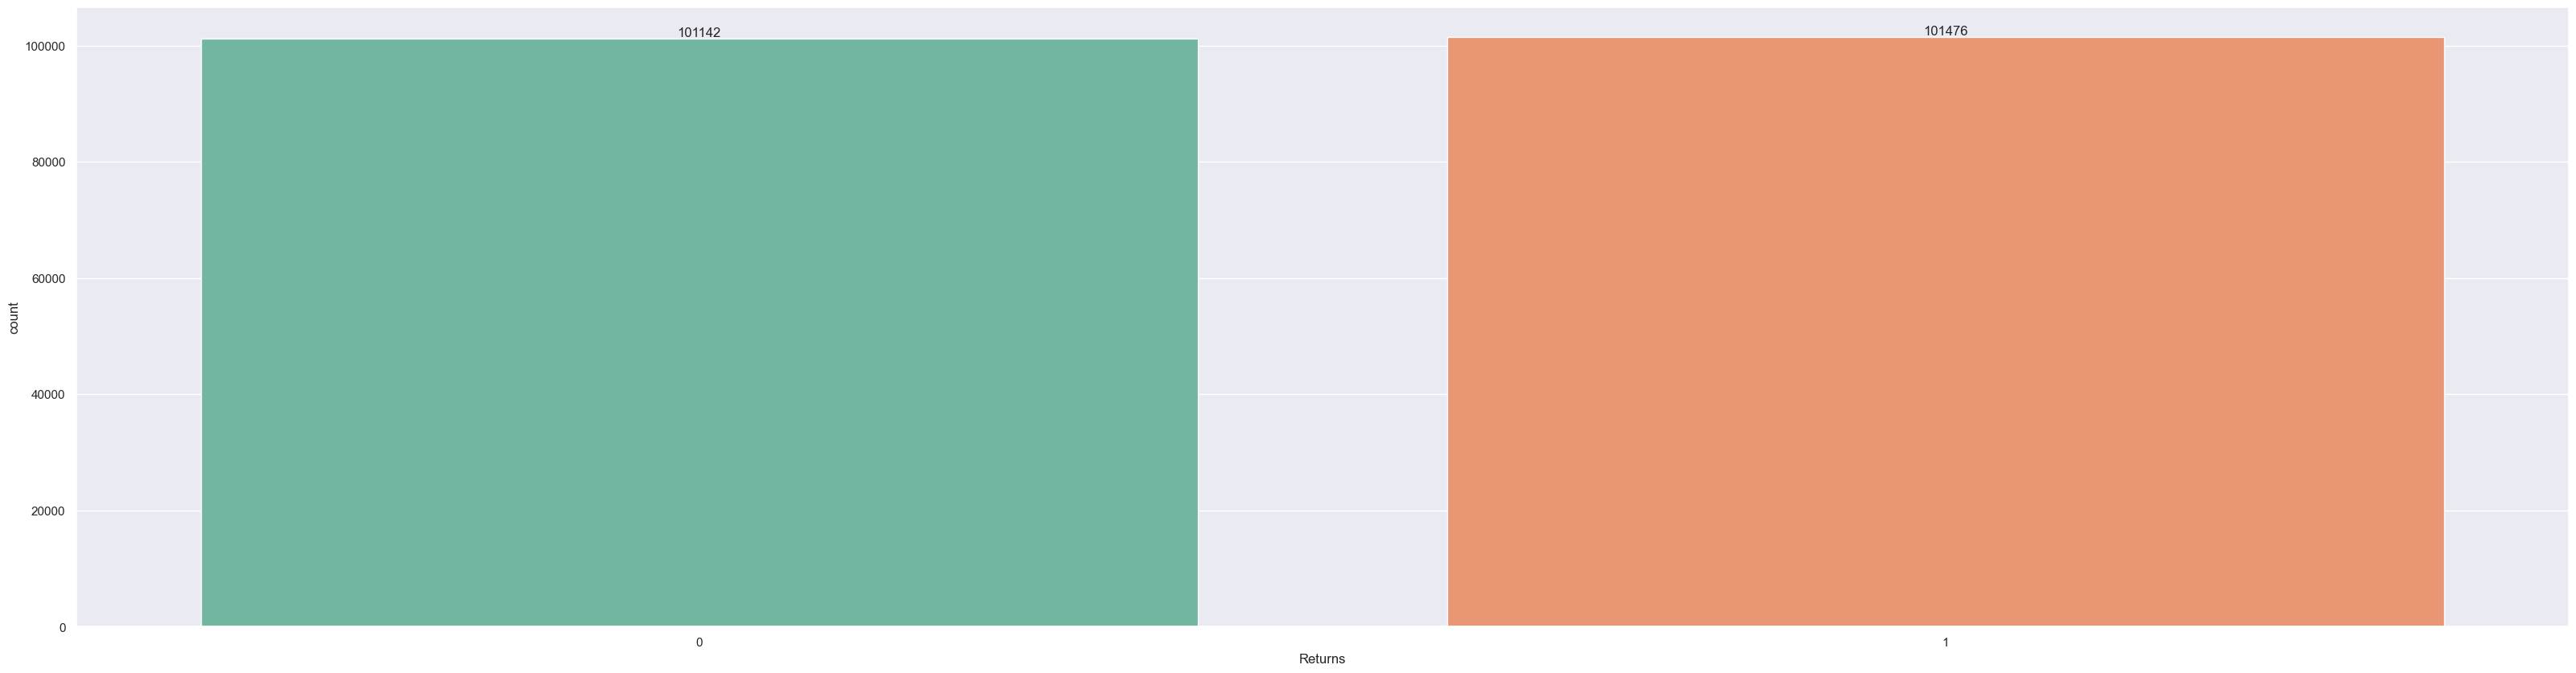

In [61]:
ax = sns.countplot(x='Returns',data=df, palette='Set2')  # Try Set1, Set2, or any palette
for bars in ax.containers:
    ax.bar_label(bars)

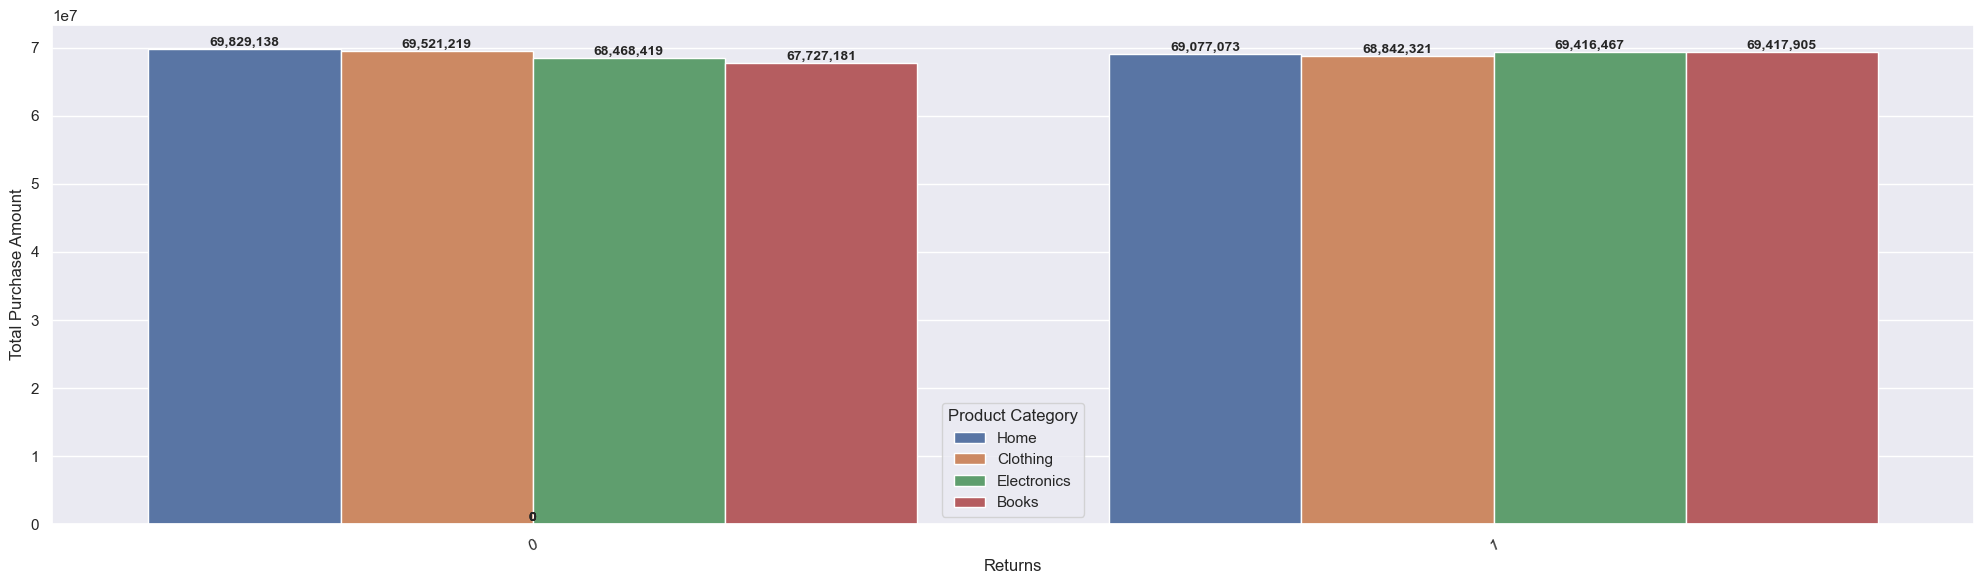

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and sorting
total_purchase_Gender = df.groupby(['Returns','Product Category'], as_index=False)['Total Purchase Amount'] \
                                .sum().sort_values(by='Total Purchase Amount', ascending=False)

# Set figure size
sns.set(rc={'figure.figsize':(20,6)})

# Create barplot
ax = sns.barplot(x='Returns', y='Total Purchase Amount',hue='Product Category',data=total_purchase_Gender)

# Add labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        height,                              # y position
        f'{height:,.0f}',                    # format number with comma
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Optional: rotate x-axis labels if needed
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

* ***Among total products sold by E-commerce website returned amount is higher.But in aggregate non returned products generate higher total purchase amount and that is why home essentials,clothing products generate highest revenue for E-commerce website.on the other hand most of the returned products are Books and electronics good.***

## Age

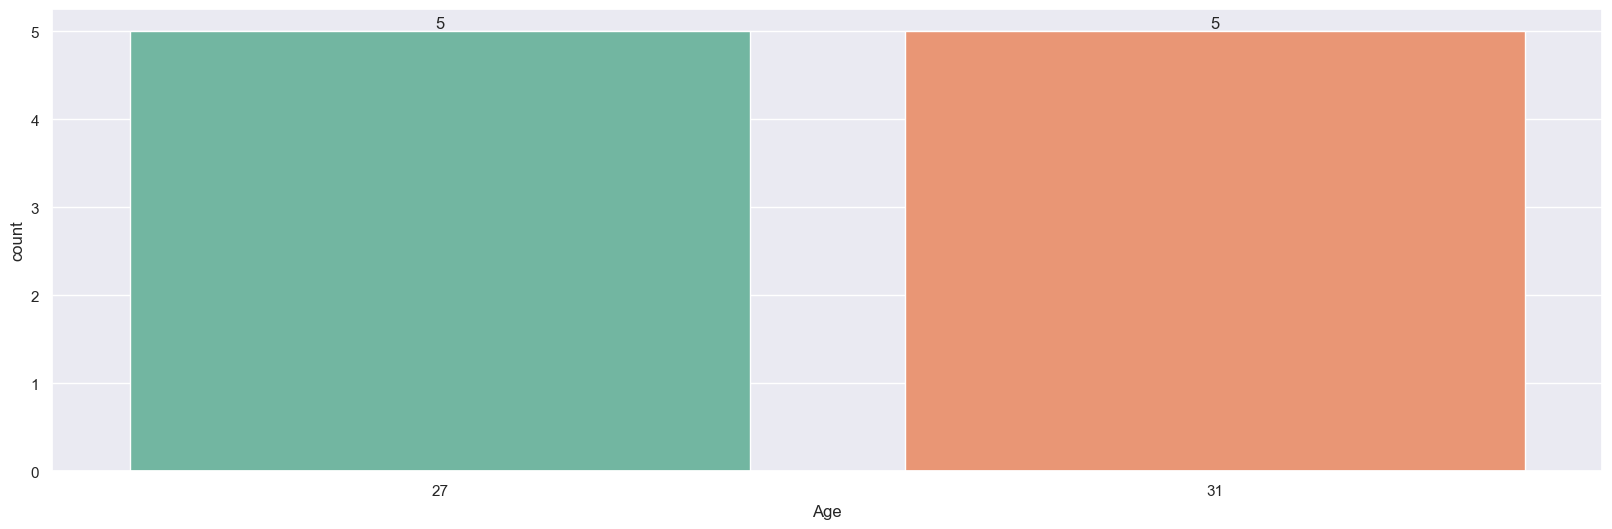

In [67]:
ax = sns.countplot(x='Age', data=df.head(10), palette='Set2')  # Try Set1, Set2, or any palette
for bars in ax.containers:
    ax.bar_label(bars)

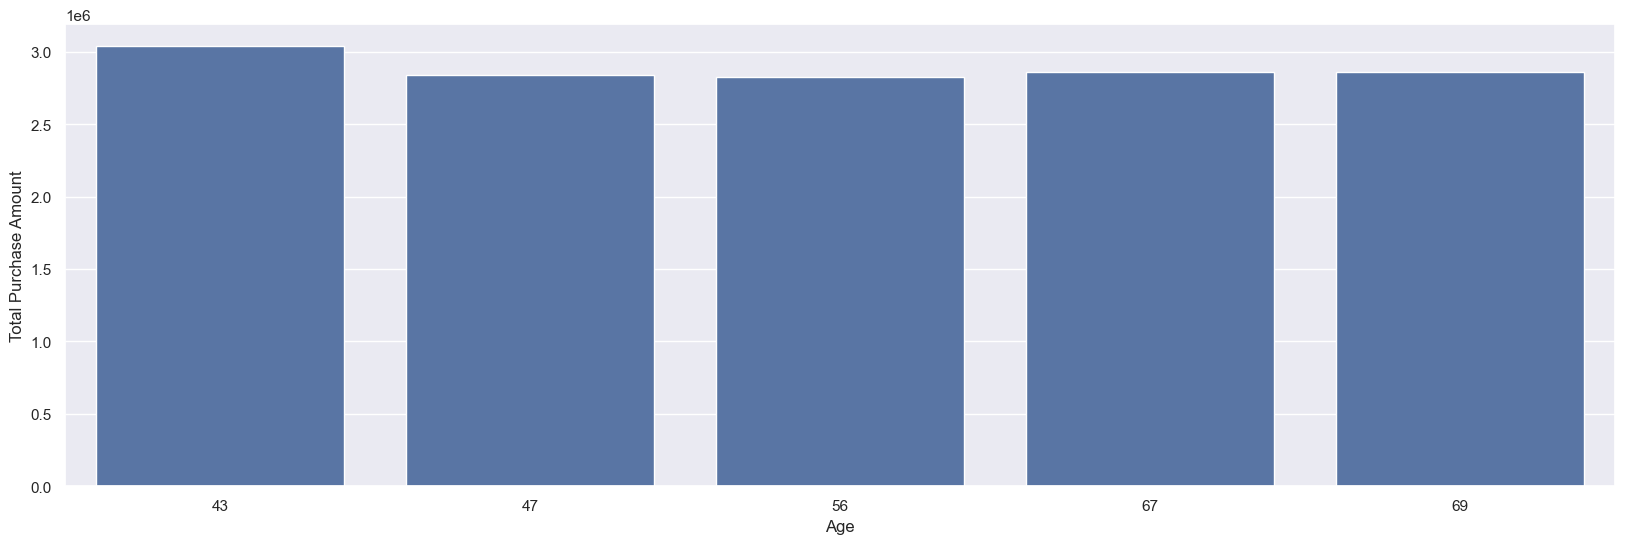

In [69]:
Sales_Category=df.groupby(['Age','Product Category'],as_index=False)['Total Purchase Amount'].sum().sort_values(by='Total Purchase Amount',ascending=False).head()
sns.barplot(x='Age',y='Total Purchase Amount',data=Sales_Category)
sns.set(rc={'figure.figsize':(8,5)})

*  ***highest order is given by peoples who are in the age group pf 31 but 43 years age peoples total purchas amount is highest***

# Conclusion

* ***Peoples(males) who are in the age of 43 order most of the home essential  without any returned product.It is the main source of revenue earned by E-commerce platform.***